# **Chile** - 283525

### Analisis de datos de las importaciones del ultimo año, con especial enfasis en los ultimos 6 meses.

> Esto es un analisis exploratorio inicial del de las Importaciones de Argentina (01/2022 - 12/2022). Los datos fueron extraidos de Softrade el 20/01/2022 a las 18:00 hs. 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ***


## Parte 1

#### Esto de abajo es una celda de codigo, que muestra el output abajo. Por ejemplo, aca levanto la bbdd e imprimo las primeras 5 columnas para ver si se cargo o no. Despues muestro informacion basica del "dataframe", que tiene X filas e Y columnas. 


In [1]:
import pandas as pd
import numpy as np
import warnings
# from google.colab import drive

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# !pwd
# !cd drive

# drive.mount('/content/drive')

warnings.simplefilter("ignore")

data_location = "./data/283525_Importaciones_01-11:2022.xlsx"

data = pd.read_excel(data_location, engine="openpyxl")

print("Este dataframe tiene (filas, col): \n",
      data.shape, "\n", "- - - - - - - - - -")

data.sample(1)

Este dataframe tiene (filas, col): 
 (234, 37) 
 - - - - - - - - - -


,DUA,item,Fecha,Código SACH,Importador,RUT,Aduana,Vía Transporte,País de Origen,País de Adquisición,FOB Unitario U$S,FOB U$S,Flete U$S,Seguro U$S,U$S CIF,U$S Unitario,Cantidad Comercial,Unidad de Medida,Kgs. Brutos,Valor ADV.,% ADV.,Acuerdo ALADI,Mercadería,Variedad,Marca,Descripción de Mercadería,Observaciones,Transportista,Bandera - Nave,Puerto de Embarque,Puerto de Desembarque,Bultos,Tipo de Bulto,Manifiesto,Fecha Manifiesto,Documento de Transporte,Fec.D.T.
17,101217,2,2022-02-08,28352500,IMPORTADORA Y DISTRIBUIDORA BL,82705900-5,SAN ANTONIO,MARITIMO,Alemania,Alemania,2.15,36514.07,2710.56,75.36,39300.0,2.31,17000.0,KILOS NETOS,19751.58,0.0,0,800,FOSFATO DICALCICO,POLVOGRADO ALIMENTICIO,B.A-F,USO EN LA INDUSTRIA ALIMENTARIA,00000017.000000 TONELADA 02E0220557631202200,CMA CGM,No disponible,ROTTERDAM,SAN ANTONIO,1,No disponible,214278,0,RE0561005(H)LEXBRE21,8012022


In [2]:
# cols = []

# def columnas_data(data):
#     for col in data:
#         cols.append(col)

# columnas_data(data)
# print(cols)

data_cols = [col for col in data.columns]

print("\033[1m" + "\nEsta bbdd tiene los siguientes datos: \n \n" +
      "\033[0m", data_cols, "\n \n- - - - - - - - - - - - - - - - -\n")



Esta bbdd tiene los siguientes datos: 
 
 ['DUA', 'item', 'Fecha', 'Código SACH', 'Importador', 'RUT', 'Aduana', 'Vía Transporte', 'País de Origen', 'País de Adquisición', 'FOB Unitario U$S', 'FOB U$S', 'Flete U$S', 'Seguro U$S', 'U$S CIF', 'U$S Unitario', 'Cantidad Comercial', 'Unidad de Medida', 'Kgs. Brutos', 'Valor ADV.', '% ADV.', 'Acuerdo ALADI', 'Mercadería', 'Variedad', 'Marca', 'Descripción de Mercadería', 'Observaciones', 'Transportista', 'Bandera - Nave', 'Puerto de Embarque', 'Puerto de Desembarque', 'Bultos', 'Tipo de Bulto', 'Manifiesto', 'Fecha Manifiesto', 'Documento de Transporte', 'Fec.D.T.'] 
 
- - - - - - - - - - - - - - - - -



Vamos a ver si estan todos los registros en todas las celdas, o si hay datos sin rellenar:

> Este metodo muchas veces puede salir mal porque a veces se rellenan los valores con n/a o cosas del estilo. Despues tambien reviso eso, no worries.


In [3]:
is_null_result = data.isnull()
# Se ordenan jerarquicamente, en caso de haber alguno, aparece primero.
cantidad_nulos = is_null_result.sum().sort_index()

print("\033[1m" + "\nCantidad de valores que faltan ser completados:\n \n" +
      "\033[0m", cantidad_nulos)



Cantidad de valores que faltan ser completados:
 
 % ADV.                       0
Acuerdo ALADI                0
Aduana                       0
Bandera - Nave               0
Bultos                       0
Cantidad Comercial           0
Código SACH                  0
DUA                          0
Descripción de Mercadería    0
Documento de Transporte      0
FOB U$S                      0
FOB Unitario U$S             0
Fec.D.T.                     0
Fecha                        0
Fecha Manifiesto             0
Flete U$S                    0
Importador                   0
Kgs. Brutos                  0
Manifiesto                   0
Marca                        0
Mercadería                   0
Observaciones                0
País de Adquisición          0
País de Origen               0
Puerto de Desembarque        0
Puerto de Embarque           0
RUT                          0
Seguro U$S                   0
Tipo de Bulto                0
Transportista                0
U$S CIF           

### La cantidad de campos que no fueron completados es porque se estan usando las palabras de relleno para indicar ausencia:

> - No disponible
> - NO DISPONIBLE
> - S/M
> - SIN MARCA
> - Sin marca

###### `regex_pattern = "/[nNsS][oOiI|\/](\s|[nN]|[Mm])|([dD|MmaAiIsS])/g"`

##### Faltan 39 Marcas, y 14 Proveedores de 77. Estas dos columnas son a las que les faltan datos.


In [4]:
print("\033[1m" + "\nEsta bbdd tiene X registros de las siguientes marcas: \n \n" +
      "\033[0m", data['Marca'].value_counts(), "\n \n- - - - - - - - - - - - - - - - -")



Esta bbdd tiene X registros de las siguientes marcas: 
 
 QUIMPAC-F                         91
ORIENTAL BIOTECH-F                39
QSA-F                             15
PCS SALES-F                       12
ECOCHEM-F                          9
TUNIFEED-F                         7
CF-F                               6
SQBT-F                             5
MIDI-F                             4
SIGMA-F                            4
SUNNIER-F                          3
CFB-F                              3
Q.S.A. -F                          2
J.-F                               2
B.A-F                              2
E.G.-F                             2
OB-F                               2
QUIMPAC-FDESHIDRATADOGRADO ALI     2
SQBT SUQIAN-F                      1
BST FEED-F                         1
SUQIAN JIAKANG TRADING-F           1
HENAN-F                            1
ORIENTAL*BIOTECH-F                 1
SANBIOTEC CORP-F                   1
SOPRODI-F                          1
C.F.B.-F        

In [5]:
print("\033[1m" + "\nEsta bbdd tiene X registros de los siguientes Importadores en el ultimo año (2022): \n \n" +
      "\033[0m", data['Importador'].value_counts(), "\n \n- - - - - - - - - - - - - - - - -")



Esta bbdd tiene X registros de los siguientes Importadores en el ultimo año (2022): 
 
 AGRICOLA SUPER LIMITADA            75
No disponible                      33
QUIMICA DEL PACIFICO LIMITADA      31
NO DETERMINADO                     16
EXPORTADORA LOS FIORDOS LTDA.      16
VETERQUIMICA S.A.                  14
IMPORTADORA Y DISTRIBUIDORA BL     13
PROTEINAS DEL AGRO S.A.            13
SUDAMERICA COMERCIAL S.A            5
ANASAC CHILE S.A.                   4
SIGMAÂ­ALDRICH QUIMICA LIMITADA     4
COMERCIAL NATUFEED LIMITADA         3
QUIMATIC SPA                        3
AGRICOLA CHOROMBO S.A               2
IDAL S A                            2
Name: Importador, dtype: int64 
 
- - - - - - - - - - - - - - - - -


#### Armo una base de datos separada con las columnas que voy a usar, y descarto las que no. Descarto las importaciones que se hayan hecho por via de transporte aerea, o que tengan menos de 15 toneladas. Filtro los precios cuyo precio unitario sea mayor a $1200 U$S. Estandarizo el formato de la fecha, para poder realizar busquedas semestrales.


In [6]:
df_new = data.loc[:, ['Código SACH', 'Fecha',  'Importador', 'Aduana', 'Vía Transporte', 'País de Origen', 'País de Adquisición', 'FOB Unitario U$S', 'FOB U$S', 'Flete U$S', 'Seguro U$S', 'U$S CIF', 'U$S Unitario', 'Cantidad Comercial', 'Unidad de Medida', 'Kgs. Brutos',
                      'Mercadería', 'Variedad', 'Marca', 'Manifiesto', 'Fecha Manifiesto']]

print("\nEl ultimo ano tiene (filas, cols):\n\n",
      df_new.shape, '\n\n- - - - - - - - -\n')

# Se eliminan registros que vengan por aire
df_new.drop(df_new[df_new['Vía Transporte'] == 'AEREA'].index, inplace=True)

df_new["U$S Unitario"] = (
    df_new['U$S CIF'] / df_new['Cantidad Comercial']).round(2)

df_new_filtered = df_new.loc[(df_new['U$S Unitario'] <= 1.2)]

df_new_filtered['Fecha'] = pd.to_datetime(df_new['Fecha'], format='%Y-%m-%d')

# print(
#     f"> Todas las unidades de medida de cantidad comercial estan en kilos netos: {df_new['Unidad de Medida'].value_counts()}\n")

df_new_filtered.sample(1)

print(df_new['Vía Transporte'].value_counts())

print(
    F"\n> Todas las unidades de medida de cantidad comercial estan en kilos netos: {df_new['Unidad de Medida'].value_counts()}\n")



El ultimo ano tiene (filas, cols):

 (234, 21) 

- - - - - - - - -

MARITIMO    227
00011         3
Name: Vía Transporte, dtype: int64

> Todas las unidades de medida de cantidad comercial estan en kilos netos: KILOS NETOS    230
Name: Unidad de Medida, dtype: int64



#### Sobre esa, armo otra base de datos separada para armar el analisis de venta en los ultimos 6 meses para Peru.


In [7]:
# # Filtro los datos por los últimos 6 meses
# df_6months = df_new_filtered.loc[(df_new_filtered['Fecha'] > "2022-05-31")
#                                  & (df_new_filtered['Fecha'] <= "2022-12-31")]


print("\033[1m\n> El ultimo ano con productos de U$S Unitario <= 1200 tienen (filas, cols):\033[0m\n\n",
      df_new_filtered.shape, '\n\n- - - - - - - - -')

print("\033[1m\n> De U$S Unitario(<=1200) en el ultimo ano tenemos los siguientes estadisticos:\n\033[0m\n",
      df_new_filtered['U$S Unitario'].describe().round(2), '\n\n- - - - - - - - -\n')

# print("\033[1m\n> Los 6 ultimos meses con productos de U$S Unitario <= 1200 tienen (filas, cols):\033[0m\n\n",
#       df_6months.shape, '\n\n- - - - - - - - -')

# print("\033[1m\n> De U$S Unitario(<=1200) en los ultimos 6 meses tenemos los siguientes estadisticos:\n\033[0m\n",
#       df_6months['U$S Unitario'].describe().round(2), '\n\n- - - - - - - - -\n')

print("> Eso significa que de los datos filtrados (no aereo, <1200) y registrados, en el primer semestre hubo solo 7 ventas registradas y en el segundo 39.\n")

# df_6months.sample(4)



> El ultimo ano con productos de U$S Unitario <= 1200 tienen (filas, cols):

 (210, 21) 

- - - - - - - - -

> De U$S Unitario(<=1200) en el ultimo ano tenemos los siguientes estadisticos:

 count    210.00
mean       0.77
std        0.14
min        0.40
25%        0.68
50%        0.80
75%        0.88
max        1.11
Name: U$S Unitario, dtype: float64 

- - - - - - - - -

> Eso significa que de los datos filtrados (no aereo, <1200) y registrados, en el primer semestre hubo solo 7 ventas registradas y en el segundo 39.



<AxesSubplot: title={'center': 'U$S Unitario Ultimo Año'}>

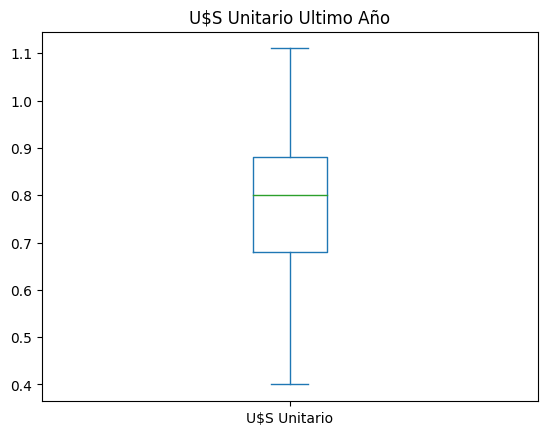

In [8]:
# df_6months['U$S Unitario'].dtype


df_new_filtered['U$S Unitario'].plot(kind='box', title="U$S Unitario Ultimo Año")


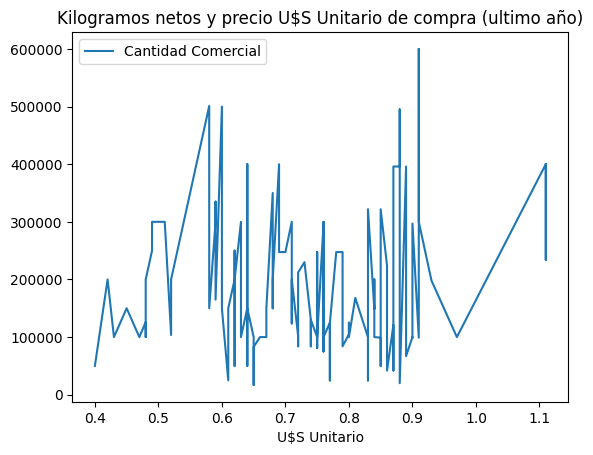

In [9]:
import matplotlib.pyplot as plt

df_new_filtered = df_new_filtered.sort_values(
    'U$S Unitario', ascending=False)

df_new_filtered.plot.line(x="U$S Unitario", y="Cantidad Comercial",
                              title="Kilogramos netos y precio U$S Unitario de compra (ultimo año)")

df_new_filtered = df_new_filtered.sort_values(
    'Cantidad Comercial', ascending=False)


## Parte 2

#### Desglose por compañia de las importaciones de los ultimos 6 meses. Este incluye:
- Nombre de la compañia
- Cantidad de importaciones
- Proveedores, y cantidad de importaciones por proveedor
- Precio promedio de compra por unidad en los ultimos 6 meses
- Volumen total neto de compra en los ultimos 6 meses
- Detalles de la ultima compra realizada


In [10]:
df_new_filtered.head(1)

,Código SACH,Fecha,Importador,Aduana,Vía Transporte,País de Origen,País de Adquisición,FOB Unitario U$S,FOB U$S,Flete U$S,Seguro U$S,U$S CIF,U$S Unitario,Cantidad Comercial,Unidad de Medida,Kgs. Brutos,Mercadería,Variedad,Marca,Manifiesto,Fecha Manifiesto
18,28352500,2022-02-08,AGRICOLA SUPER LIMITADA,SAN ANTONIO,MARITIMO,Túnez,Túnez,0.84,504000.01,41999.99,600.0,546600.0,0.91,600000.0,KILOS NETOS,609000.0,FOSFATO DICALCICO,DESHIDRATADO,TUNIFEED-F,214278,0


In [11]:
# FX DEVUELVE DETALLES DE IMPORTADOR

def last_year_data():
    global dataframe_toExcel

    companias_mayores_15tm = []

    dataframe_toExcel = {
        "NCM/NANDINA/SACH": [],
        "Importador": [],
        "No. Importaciones": [],
        "Volumen Total (Tn)": [],
        "Precio Promedio": [],
        "Ultimo Precio": [],
        # "Proveedores": [],
        "Origenes": [],
        "Ref. Ultima Compra": [],
        "Participacion en Vol. Total": []
    }

    for company in df_new_filtered['Importador'].unique():

        data = df_new_filtered[df_new_filtered['Importador']
                               == f"{company}"]
        volumenTotalImportacionTn = (
            df_new_filtered['Cantidad Comercial'].sum()/1000).round(2)

        if (data['Cantidad Comercial'].sum() > 15000):

            companias_mayores_15tm.append(company)
            volumenTotalCompania = (data['Cantidad Comercial'].sum()/1000).round(2)
            ncmNoTrailZeroes = str(data._get_value(
                0, 0, takeable=True)).rstrip('0')

            # Adding iterated values to the dataframe
            dataframe_toExcel['NCM/NANDINA/SACH'].append(
                int(ncmNoTrailZeroes)
            )
            dataframe_toExcel['Importador'].append(company)
            dataframe_toExcel['No. Importaciones'].append(len(data))
            dataframe_toExcel['Volumen Total (Tn)'].append(
                volumenTotalCompania
            )
            dataframe_toExcel['Precio Promedio'].append(
                (data['U$S Unitario'].mean().round(2))*1000)
            dataframe_toExcel['Origenes'].append(
                ', '.join(data['País de Origen'].unique().tolist()))

            data = data.sort_values('Fecha', ascending=False)
            fecha_ultima_compra = data['Fecha'].iloc[0]
            data_ultima_compra = data[data['Fecha'] == fecha_ultima_compra]

            dataframe_toExcel['Ultimo Precio'].append(
                (data_ultima_compra['U$S Unitario']._get_value(0, ':,-1'))*1000)

            dataframe_toExcel['Ref. Ultima Compra'].append(
                f"Fecha: {fecha_ultima_compra.date()} | Ctdad: {(data_ultima_compra['Cantidad Comercial'].sum()/1000).round(2)} tns"
            )
            dataframe_toExcel['Participacion en Vol. Total'].append(
                f"{round((volumenTotalCompania / volumenTotalImportacionTn) * 100)}%"

            )

            # print(
            #     f"\033[1m> Estos datos son de:\n \033[0m {company}\n- - - - - - - - - -\n")

            # print(
            #     f"\033[1m> Estos datos tienen (filas, cols):\033[0m {data.shape}\n- - - - - - - - - -\n")

            # print(
            #     f"\033[1m> Los proveedores de fueron:\033[0m \n {data['Proveedor'].value_counts()}\n- - - - - - - - - -\n")

            # print(
            #     f"\033[1m> El precio promedio de U$S Unitario en los ultimos 6 meses fue:\033[0m {data['U$S Unitario'].mean().round(2)}\n- - - - - - - - - -\n")
            # print(
            #     f"\033[1m> El volumen total de compra en TONELADAS fue de:\033[0m {(data['Kgs. Netos'].sum()/1000).round(2)}\n- - - - - - - - - -\n")

            # print(
            #     f"\033[1m> Las compras provienen de: \n\033[0m{data['País de Origen'].value_counts()}\n- - - - - - - - - -\n")

            # print(
            #     f"\033[1m> La ultima compra fue:\033[0m \n {data_ultima_compra}\n")

            # print(
            #     f"\033[1m\n__________________________________________________________________________________\n")

    print(
        f"\033[1m> Las companias con mas de 15 tm en el ultimo semestre fueron:\033[0m {companias_mayores_15tm} ")
    print(
        f"\033[1m\n__________________________________________________________________________________\n")


last_year_data()

excel_new_data = pd.DataFrame.from_records(
    dataframe_toExcel).sort_values('Volumen Total (Tn)', ascending=False).reset_index(drop=True)

excel_new_data = excel_new_data[['NCM/NANDINA/SACH', 'Importador', 'Volumen Total (Tn)', 'No. Importaciones',
                                 'Precio Promedio', 'Ultimo Precio', 'Ref. Ultima Compra', "Participacion en Vol. Total", 'Origenes']]


excel_new_data

> Las companias con mas de 15 tm en el ultimo semestre fueron: ['AGRICOLA SUPER LIMITADA', 'ANASAC CHILE S.A.', 'No disponible', 'NO DETERMINADO', 'PROTEINAS DEL AGRO S.A.', 'COMERCIAL NATUFEED LIMITADA', 'SUDAMERICA COMERCIAL S.A', 'QUIMICA DEL PACIFICO LIMITADA', 'AGRICOLA CHOROMBO S.A', 'VETERQUIMICA S.A.', 'EXPORTADORA LOS FIORDOS LTDA.', 'IDAL S A'] 

__________________________________________________________________________________



,NCM/NANDINA/SACH,Importador,Volumen Total (Tn),No. Importaciones,Precio Promedio,Ultimo Precio,Ref. Ultima Compra,Participacion en Vol. Total,Origenes
0,283525,AGRICOLA SUPER LIMITADA,18265.91,75,860.0,870.0,Fecha: 2022-11-25 | Ctdad: 396.0 tns,46%,"Túnez, Perú, Estados Unidos"
1,283525,No disponible,6062.00,32,680.0,710.0,Fecha: 2022-11-29 | Ctdad: 200.0 tns,15%,China
2,283525,QUIMICA DEL PACIFICO LIMITADA,3270.50,31,820.0,850.0,Fecha: 2022-11-21 | Ctdad: 200.0 tns,8%,Perú
3,283525,EXPORTADORA LOS FIORDOS LTDA.,2821.50,16,890.0,870.0,Fecha: 2022-11-29 | Ctdad: 148.5 tns,7%,Perú
4,283525,PROTEINAS DEL AGRO S.A.,2550.00,13,570.0,640.0,Fecha: 2022-11-22 | Ctdad: 300.0 tns,6%,China
5,283525,NO DETERMINADO,2276.00,14,570.0,520.0,Fecha: 2022-04-01 | Ctdad: 200.0 tns,6%,China
6,283525,VETERQUIMICA S.A.,1393.50,13,810.0,870.0,Fecha: 2022-10-18 | Ctdad: 50.0 tns,3%,"Perú, China"
7,283525,ANASAC CHILE S.A.,1301.00,4,560.0,590.0,Fecha: 2022-08-12 | Ctdad: 335.0 tns,3%,China
8,283525,SUDAMERICA COMERCIAL S.A,963.75,5,650.0,740.0,Fecha: 2022-09-27 | Ctdad: 130.0 tns,2%,China
9,283525,COMERCIAL NATUFEED LIMITADA,600.00,3,500.0,590.0,Fecha: 2022-06-02 | Ctdad: 450.0 tns,2%,China


In [14]:

import os
import json
import gspread as gs

CURRENT_WD = os.getcwd()
COUNTRY_WD = (os.path.basename(CURRENT_WD).split('/')[-1]).upper()
CREDENTIALS = '../credentials.json'

# gc = gs.oauth(credentials_filename=CREDENTIALS)
gc = gs.service_account(filename='../service-credentials.json')
sh = gc.open('Resumen2022_Sudamerica')

worksheet_list = sh.worksheets()

print(
    f"\033[1m> Las hojas del excel actualmente son:\033[0m\n {worksheet_list}\n- - - - - - - - - -\n")

try:
    ws = sh.worksheet(f'{COUNTRY_WD}')
    # Code if spreadsheet exists:
    print("Spreadsheet exists: Modifying existing working sheet...\n- - - - - - - - - -\n")
    # ws.clear()
    df_values = excel_new_data.values.tolist()
    sh.values_append(f'{COUNTRY_WD}', {'valueInputOption': 'RAW'}, {
                     'values': df_values})
    print("> Spreadsheet modified.\n- - - - - - - - - -\n")
except gs.exceptions.WorksheetNotFound:
    # Code if spreadsheet doesn't exist:
    print("Spreadsheet doesn't exist: Creating the new worksheet...\n- - - - - - - - - -\n")
    sh.add_worksheet(title=f"{COUNTRY_WD}", rows=100, cols=20)
    ws = sh.worksheet(f'{COUNTRY_WD}')
    ws.update([excel_new_data.columns.values.tolist()] +
              excel_new_data.values.tolist())
    print("> Spreadsheet created.\n- - - - - - - - - -\n")


> Las hojas del excel actualmente son:
 [<Worksheet 'ARGENTINA' id:1406011122>]
- - - - - - - - - -

Spreadsheet doesn't exist: Creating the new worksheet...
- - - - - - - - - -

> Spreadsheet created.
- - - - - - - - - -



## Parte 3

#### En esta parte se responden preguntas especificas usando datos anuales y semestrales.

- Cuanto volumen importo cada compañia peruana en el ultimo año, y semestre?

In [ ]:
# df_new_filtered | df_6months_filtered
print("\033[1m\n ~ ULTIMO AÑO (2022) ~ \033[0m\n\n- - - - - - - - -")

print("\033[1m\n> El ultimo año con productos de U$S Unitario <= 1200 tiene (filas, cols):\033[0m\n\n",
      df_new_filtered.shape, '\n\n- - - - - - - - -')

print("\033[1m", "\n> De U$S Unitario(<=1200) en el ultimo año tenemos los siguientes estadisticos:\n", "\033[0m\n",
      df_new_filtered['U$S Unitario'].describe().round(2), '\n\n- - - - - - - - -\n')

print("\033[1m ~ ULTIMO SEMESTRE (2022) ~ \033[0m\n\n- - - - - - - - -")

print("\033[1m\n> Los 6 ultimos meses con productos de U$S Unitario <= 1200 tienen (filas, cols):\033[0m\n\n",
      df_6months_filtered.shape, '\n\n- - - - - - - - -')

print("\033[1m", "\n> De U$S Unitario(<=1200) en los ultimos 6 meses tenemos los siguientes estadisticos:\n", "\033[0m\n",
      df_6months_filtered['U$S Unitario'].describe().round(2), '\n\n- - - - - - - - -\n')



 ~ ULTIMO AÑO (2022) ~ 

- - - - - - - - -

> El ultimo año con productos de U$S Unitario <= 1200 tiene (filas, cols):

 (191, 21) 

- - - - - - - - -
 
> De U$S Unitario(<=1200) en el ultimo año tenemos los siguientes estadisticos:
 
 count    191.00
mean       0.77
std        0.14
min        0.40
25%        0.67
50%        0.79
75%        0.88
max        1.11
Name: U$S Unitario, dtype: float64 

- - - - - - - - -

 ~ ULTIMO SEMESTRE (2022) ~ 

- - - - - - - - -

> Los 6 ultimos meses con productos de U$S Unitario <= 1200 tienen (filas, cols):

 (102, 21) 

- - - - - - - - -
 
> De U$S Unitario(<=1200) en los ultimos 6 meses tenemos los siguientes estadisticos:
 
 count    102.00
mean       0.78
std        0.14
min        0.45
25%        0.66
50%        0.86
75%        0.90
max        1.11
Name: U$S Unitario, dtype: float64 

- - - - - - - - -



In [ ]:
# Volumen neto total por año
totalNetImport_year = df_new_filtered[['Importador',  'Cantidad Comercial']]

# print(maxImport_year.head(1))

totalNetImport_6months = df_6months_filtered[[
    'Importador',  'Cantidad Comercial']]

# print(maxImport_6months.head(1))


In [ ]:
year_groupedby = (totalNetImport_year.groupby(
    "Importador").sum().sort_values('Cantidad Comercial', ascending=False)/1000).round(2)

print("\033[1m\n> Volumen total neto de importaciones en el ultimo año por compañia en TONELADAS:\n\033[0m")

year_groupedby.apply(print)

print("\n- - - - - - - - -\n")



> Volumen total neto de importaciones en el ultimo año por compañia en TONELADAS:

Importador
AGRICOLA SUPER LIMITADA          16681.91
No disponible                     5137.00
QUIMICA DEL PACIFICO LIMITADA     2600.50
NO DETERMINADO                    2276.00
PROTEINAS DEL AGRO S.A.           2250.00
EXPORTADORA LOS FIORDOS LTDA.     2227.50
VETERQUIMICA S.A.                 1393.50
ANASAC CHILE S.A.                 1301.00
SUDAMERICA COMERCIAL S.A           963.75
COMERCIAL NATUFEED LIMITADA        600.00
AGRICOLA CHOROMBO S.A              310.00
IDAL S A                           181.00
Name: Cantidad Comercial, dtype: float64

- - - - - - - - -



In [ ]:
sixMonths_groupedby = (totalNetImport_6months.groupby(
    "Importador").sum().sort_values('Cantidad Comercial', ascending=False)/1000).round(2)

print("\033[1m\n> Volumen total neto de importaciones en el ultimo semestre por compañia en TONELADAS:\n\033[0m")

sixMonths_groupedby.apply(print)

# print(totalNetImport_6months["Kgs. Netos"].sum()) - Vol. total sin discriminar compañias

print("\n- - - - - - - - -\n")



> Volumen total neto de importaciones en el ultimo semestre por compañia en TONELADAS:

Importador
AGRICOLA SUPER LIMITADA          7486.96
No disponible                    5137.00
EXPORTADORA LOS FIORDOS LTDA.    2227.50
PROTEINAS DEL AGRO S.A.          1850.00
QUIMICA DEL PACIFICO LIMITADA     743.00
VETERQUIMICA S.A.                 695.00
SUDAMERICA COMERCIAL S.A          663.75
ANASAC CHILE S.A.                 500.00
COMERCIAL NATUFEED LIMITADA       450.00
AGRICOLA CHOROMBO S.A             208.00
Name: Cantidad Comercial, dtype: float64

- - - - - - - - -

